# Visualize the node embeddings
### 2D t-sne scatterplot of the resulting node embeddings
Here we visually check whether embeddings have some underlying cluster structure.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Import data

Create scatterplot

In [9]:
emb_transformed = pd.read_csv('data/emb_transformed.csv', index_col=0)

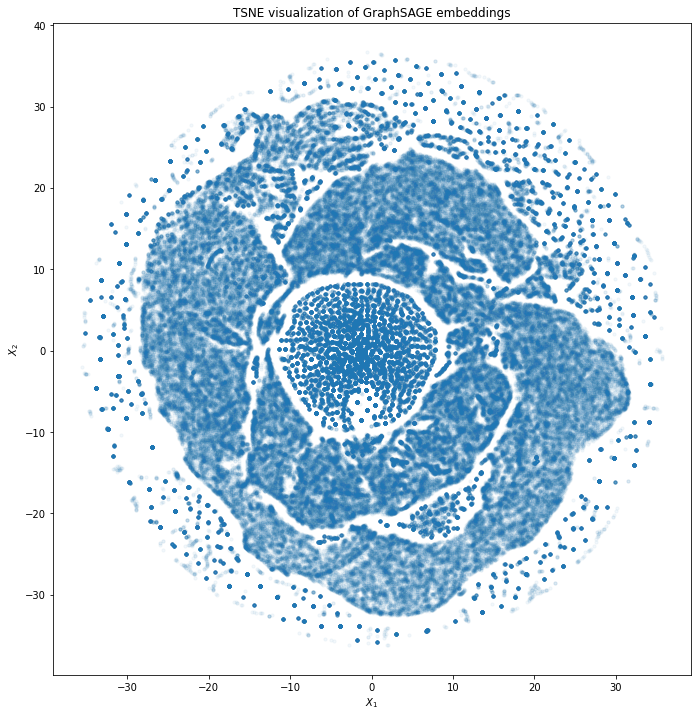

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(
    emb_transformed['0'], 
    emb_transformed['1'], 
    alpha=0.05,
    s=10
)

transform = TSNE  # PCA

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title("{} visualization of GraphSAGE embeddings".format(transform.__name__))
plt.show()

## t-SNE Colored by Infomap Community Membership

We also depict the same t-sne plot colored by infomap communities. As we can observe t-sne of GraphSAGE embeddings do not really separate the infomap communities.

In [13]:
infomap_com_df = pd.read_csv('data/infomap_community_id.csv', index_col=0)
infomap_com_dict = infomap_com_df.to_dict(orient='dict')['0']

Text(0.5, 1.0, 't-sne with colors corresponding to infomap communities')

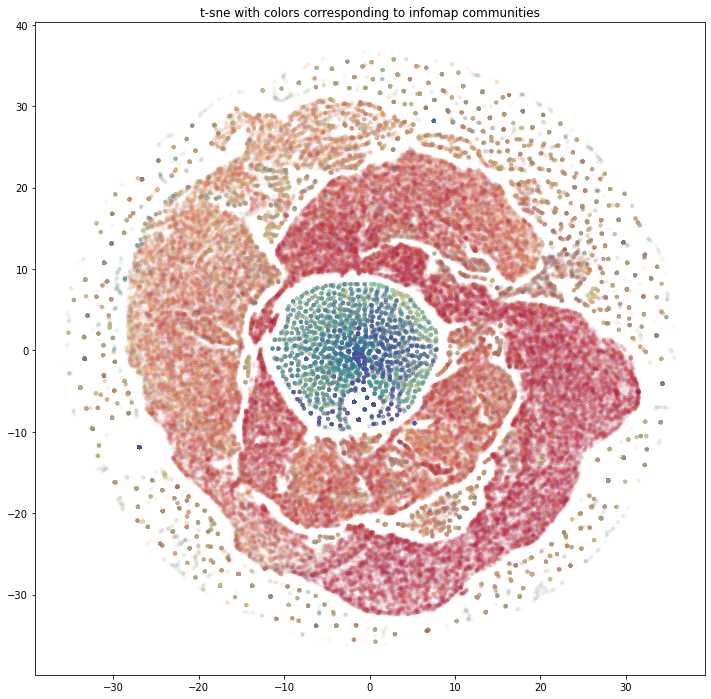

In [14]:
emb_transformed["infomap_clusters"] = emb_transformed.index.map(infomap_com_dict)
plt.figure(figsize=(12,12))
plt.scatter(
    emb_transformed['0'],
    emb_transformed['1'],
    c=emb_transformed["infomap_clusters"],
    cmap="Spectral",
    edgecolors=None,
    alpha=0.05,
    s=10,
)
plt.title("t-sne with colors corresponding to infomap communities")